# Super Market Analysis 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('C:/Andre files/Super_Market/archive/Stores.csv')
data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


## Cleanning and Preparation

In [13]:
# Let's get more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [14]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [25]:
data.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

## Exploratory Analysis

### Store Area

In [18]:
data.Store_Area

0      1659
1      1461
2      1340
3      1451
4      1770
       ... 
891    1582
892    1387
893    1200
894    1299
895    1174
Name: Store_Area, Length: 896, dtype: int64

In [19]:
data.Store_Area.median()

1477.0

In [28]:
# Let's get the types by size
store_type = data.Store_Area.unique()
len(store_type)

583

### Items Available

In [29]:
data.Items_Available

0      1961
1      1752
2      1609
3      1748
4      2111
       ... 
891    1910
892    1663
893    1436
894    1560
895    1429
Name: Items_Available, Length: 896, dtype: int64

In [32]:
data.Items_Available.median()

1773.5

In [33]:
data.Items_Available.mean()

1782.0357142857142

In [34]:
store_items = data.Items_Available.unique()
len(store_items)

616

<AxesSubplot:xlabel='Items_Available', ylabel='Store_Area'>

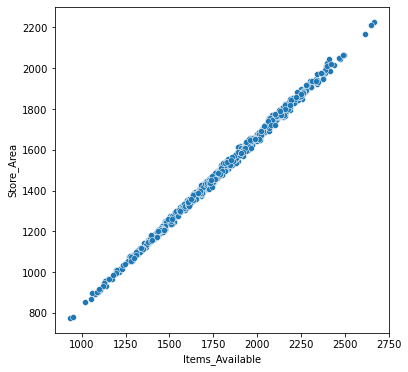

In [35]:
# Let's see if there is a relation store size and items available
plt.figure(figsize=(6,6))
#sns.boxplot(x='Store_Area', data=data)
sns.scatterplot(x='Items_Available',y='Store_Area', data=data)
# As expected, the larger the store more items are available to sell

### Daily Customer 

In [37]:
data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [38]:
data.Daily_Customer_Count

0       530
1       210
2       720
3       620
4       450
       ... 
891    1080
892     850
893    1060
894     770
895    1110
Name: Daily_Customer_Count, Length: 896, dtype: int64

In [41]:
data.Daily_Customer_Count.mean()

786.3504464285714

In [42]:
data.Daily_Customer_Count.median()

780.0

<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Store_Area'>

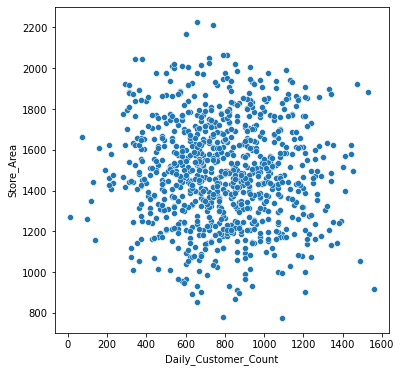

In [49]:
# Let's see if there is a relation between store size and daily customer 
plt.figure(figsize=(6,6))
sns.scatterplot(x='Daily_Customer_Count',y='Store_Area', data=data)

In [50]:
data['Store_Area'].corr(data['Daily_Customer_Count'])
# as we can see, there is no correlation between Daily Customer and Store size 

-0.04142309530269156

### Store Sales

In [51]:
data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [52]:
data.Store_Sales

0      66490
1      39820
2      54010
3      53730
4      46620
       ...  
891    66390
892    82080
893    76440
894    96610
895    54340
Name: Store_Sales, Length: 896, dtype: int64

In [53]:
data.Store_Sales.mean()

59351.30580357143

In [54]:
data.Store_Sales.median()

58605.0

<AxesSubplot:xlabel='Store_Sales', ylabel='Store_Area'>

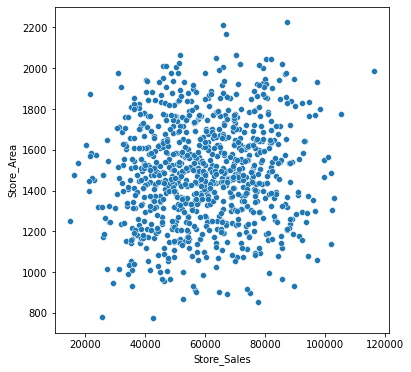

In [55]:
# Let's see if there is a relation between store size and Sales 
plt.figure(figsize=(6,6))
sns.scatterplot(x='Store_Sales',y='Store_Area', data=data)
# There seems o be no correlation between Store size and Sales

In [56]:
data['Store_Area'].corr(data['Store_Sales'])

0.09747379539480508

In [57]:
# Correlation close to 0, which means no correlation between store size and sales

<AxesSubplot:xlabel='Store_Sales', ylabel='Items_Available'>

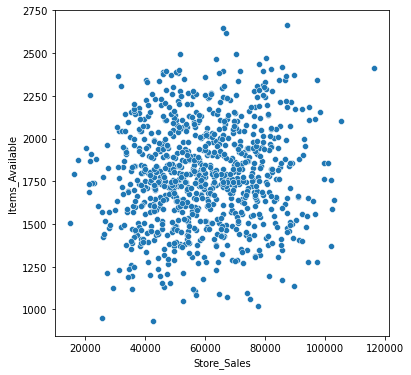

In [58]:
# Let's see if there is a relation between Items Available and Sales 
plt.figure(figsize=(6,6))
sns.scatterplot(x='Store_Sales',y='Items_Available', data=data)
# There seems o be no correlation between Store size and Sales

In [59]:
data['Items_Available'].corr(data['Store_Sales'])

0.09884943476393077

In [60]:
# There is also no correlation between Sales and Items for sale

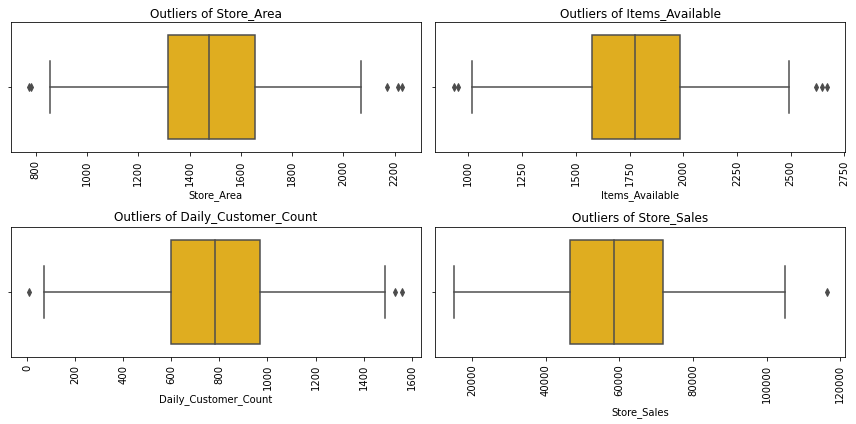

In [61]:
# Let's now search for outliers in the dataset 
# Create a list for all columns
int_cols = ['Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales']

# Define a functon to plot a graph
def data_outliers(x,fig):
    # subplot is used to plot multiple graph
    plt.subplot(2,2,fig)
    # title of the graph
    plt.title('Outliers of ' + x)
    # plot the graph
    sns.boxplot(x=data[x], palette=("Wistia"))
    plt.xticks(rotation= 90)
    
plt.figure(figsize=(12,6))
# call the funtion for each column
for e, i in enumerate(int_cols):
    data_outliers(i,e+1)

plt.tight_layout()
plt.show();

### Sales Prediction

In [62]:
# Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [63]:
data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [66]:
X = np.asarray(data[['Store_Area', 'Items_Available', 'Daily_Customer_Count']])
X[0:5]

array([[1659, 1961,  530],
       [1461, 1752,  210],
       [1340, 1609,  720],
       [1451, 1748,  620],
       [1770, 2111,  450]], dtype=int64)

In [67]:
y = np.asarray(data['Store_Sales'])
y[0:5]

array([66490, 39820, 54010, 53730, 46620], dtype=int64)

In [97]:
# train_test_split(x, y, random_state=1)
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [98]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print(len(x_train),len(y_train))

x_train: (716, 3)
x_test: (180, 3)
y_train: (716,)
y_test: (180,)
716 716


In [99]:
linReg=LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [100]:
# linReg.fit(x_train, y_train)

model =linReg.fit(x_train,y_train)
print('linRegBeta =',linReg.coef_)
print()
print("linRegIntercept = ",linReg.intercept_)

linRegBeta = [-42.82697366  40.32997434   2.04694931]

linRegIntercept =  49719.5761905231


In [101]:
# linreg.predict(x_test)

y_hat =linReg.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test))**2) # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error 
print('MSE=',mse)
print()
print(mse,rmse)

MSE= 275058660.31359714

275058660.31359714 16584.89253247054


In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test, y_hat)}')

MAE: 13461.24603485672


In [103]:
help(linReg)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [104]:
linReg.score(x_train,y_train)

0.008330541211924003

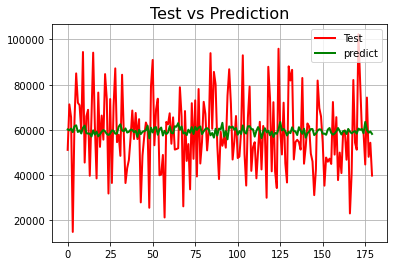

In [110]:
t= np.arange(len(x_test))
plt.plot(t,y_test,'r-',linewidth = 2,label = 'Test')
plt.plot(t,y_hat,'g-',linewidth = 2,label = 'predict')
plt.title("Test vs Prediction",fontsize = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()